In [84]:
import pandas as pd
import numpy as np

import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
train_set = pd.read_csv("/content/training.csv",sep="\t")
trial_set = pd.read_csv("/content/trial.csv",sep="\t")

In [86]:
print(train_set.shape)
train_set.head()

(10000, 7)


,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription
0,1.jpg,0,0,0,0,0,Milk Milk.zip
1,10.jpg,1,0,0,0,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S..."
2,1000.jpg,0,0,0,0,0,BREAKING NEWS: Russia releases photo of DONALD...
3,10000.jpg,0,0,0,0,0,MAN SEEKING WOMAN Ignad 18 O
4,10006.jpg,0,0,0,0,0,Me explaining the deep lore of. J.R.R. Tolkein...


In [87]:
print(trial_set.shape)
trial_set.head()

(100, 7)


,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription
0,28.jpg,0,0,0,0,0,"not now, dad. We should burn Jon Snow. stop it..."
1,30.jpg,0,0,0,0,0,there may have been a mixcommunication with th...
2,33.jpg,0,0,0,0,0,i shouldn't have sold my boat
3,58.jpg,1,0,0,0,1,"Bitches be like, It was my fault i made him mad"
4,89.jpg,0,0,0,0,0,find a picture of 4 girls together on FB make ...


In [88]:
text_train = train_set['Text Transcription']
text_trial = trial_set['Text Transcription']

In [89]:
print(text_train,"\n\n")
print(text_trial)

0                                           Milk Milk.zip
1       ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...
2       BREAKING NEWS: Russia releases photo of DONALD...
3                            MAN SEEKING WOMAN Ignad 18 O
4       Me explaining the deep lore of. J.R.R. Tolkein...
                              ...                        
9995        WAITING FOR THE END OF THE COVID  imgflip.com
9996                  SMART WOMEN ARE AROUND  imgflip.com
9997        GOOD GIRLS ARE BEHIND THE CORNER  imgflip.com
9998                     COOKING FOR MY WIFE  imgflip.com
9999    LISTEN TOMORROW WILL BE MONDAY imgflip.com FRO...
Name: Text Transcription, Length: 10000, dtype: object 


0     not now, dad. We should burn Jon Snow. stop it...
1     there may have been a mixcommunication with th...
2                         i shouldn't have sold my boat
3       Bitches be like, It was my fault i made him mad
4     find a picture of 4 girls together on FB make ...
                        

In [90]:
text_train = text_train.str.lower()
text_trial = text_trial.str.lower()

In [91]:
print(text_train,"\n\n")
print(text_trial)

0                                           milk milk.zip
1       roses are red, violets are blue if you don't s...
2       breaking news: russia releases photo of donald...
3                            man seeking woman ignad 18 o
4       me explaining the deep lore of. j.r.r. tolkein...
                              ...                        
9995        waiting for the end of the covid  imgflip.com
9996                  smart women are around  imgflip.com
9997        good girls are behind the corner  imgflip.com
9998                     cooking for my wife  imgflip.com
9999    listen tomorrow will be monday imgflip.com fro...
Name: Text Transcription, Length: 10000, dtype: object 


0     not now, dad. we should burn jon snow. stop it...
1     there may have been a mixcommunication with th...
2                         i shouldn't have sold my boat
3       bitches be like, it was my fault i made him mad
4     find a picture of 4 girls together on fb make ...
                        

In [92]:
text_train= text_train.str.replace('[^\w\s]',' ')
text_trial = text_trial.str.replace('[^\w\s]',' ')

In [93]:
print(text_train,"\n\n")
print(text_trial)

0                                           milk milk zip
1       roses are red  violets are blue if you don t s...
2       breaking news  russia releases photo of donald...
3                            man seeking woman ignad 18 o
4       me explaining the deep lore of  j r r  tolkein...
                              ...                        
9995        waiting for the end of the covid  imgflip com
9996                  smart women are around  imgflip com
9997        good girls are behind the corner  imgflip com
9998                     cooking for my wife  imgflip com
9999    listen tomorrow will be monday imgflip com fro...
Name: Text Transcription, Length: 10000, dtype: object 


0     not now  dad  we should burn jon snow  stop it...
1     there may have been a mixcommunication with th...
2                         i shouldn t have sold my boat
3       bitches be like  it was my fault i made him mad
4     find a picture of 4 girls together on fb make ...
                        

In [94]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
#stopwords.words('english')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [95]:
nonsense_words=['com','imgflip','1','2','quickmeme','memecenter','bestdemotivationalposter','bestdemotivationalpost']

In [96]:
text_train = text_train.apply(word_tokenize).apply(lambda x: [word for word in x if word not in stopwords.words('english') and word not in nonsense_words])
text_trial = text_trial.apply(word_tokenize).apply(lambda x: [word for word in x if word not in stopwords.words('english') and word not in nonsense_words])

In [97]:
print(text_train,"\n\n")
print(text_trial)

0                                       [milk, milk, zip]
1             [roses, red, violets, blue, say, yes, rape]
2       [breaking, news, russia, releases, photo, dona...
3                        [man, seeking, woman, ignad, 18]
4       [explaining, deep, lore, j, r, r, tolkein, wor...
                              ...                        
9995                                [waiting, end, covid]
9996                               [smart, women, around]
9997                        [good, girls, behind, corner]
9998                                      [cooking, wife]
9999    [listen, tomorrow, monday, youtube, user, mens...
Name: Text Transcription, Length: 10000, dtype: object 


0     [dad, burn, jon, snow, stop, dad, know, happen...
1     [may, mixcommunication, decorator, happy, birt...
2                                          [sold, boat]
3                     [bitches, like, fault, made, mad]
4     [find, picture, 4, girls, together, fb, make, ...
                        

In [98]:
def to_vocabolary(data):
  from collections import Counter
  total_words = list()
  for sentence in data:
    total_words = total_words+sentence

  counts = Counter(total_words)
  return counts

In [99]:
def get_info_vocabulary(vocabulary):
  return len(vocabulary.keys()), {k: round(v / total,6) for total in (sum(vocabulary.values()),) for k, v in vocabulary.items()}

#A.1) The size of the vocabulary is **21101** words

In [100]:
counter = to_vocabolary(text_train)
size_of_voc, frequencies = get_info_vocabulary(counter)
print(size_of_voc)

19891


# A.2) Frequency of every word in the vocabulary

In [101]:
print(dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True)))

{'women': 0.011147, 'like': 0.007973, 'woman': 0.006331, 'get': 0.004973, 'wife': 0.00467, 'girlfriend': 0.004496, 'men': 0.004431, 'man': 0.004119, 'girl': 0.004009, 'one': 0.003954, 'kitchen': 0.003835, 'house': 0.003486, 'call': 0.00333, 'female': 0.003275, 'girls': 0.00323, 'make': 0.00322, 'want': 0.002991, 'know': 0.002973, 'people': 0.002899, 'made': 0.002596, '3': 0.00256, 'net': 0.00256, 'feminist': 0.002505, 'see': 0.002486, 'time': 0.002468, 'day': 0.002413, 'good': 0.002385, 'got': 0.00233, 'clean': 0.002294, 'go': 0.002229, 'first': 0.00222, 'cheat': 0.002193, 'new': 0.002165, 'meme': 0.002119, 'back': 0.002074, 'look': 0.002074, 'hooker': 0.002046, 'never': 0.002018, 'â': 0.002, 'think': 0.002, 'prostitute': 0.00189, 'cooking': 0.001872, 'feminism': 0.001807, 'need': 0.001807, 'sex': 0.001807, 'work': 0.001789, 'mom': 0.00178, 'love': 0.001752, 'right': 0.001752, 'said': 0.001743, 'ð': 0.001743, '5': 0.001734, 'still': 0.001725, 'guy': 0.001716, 'home': 0.001707, '10': 0.

# A.3) Which words are most common?

In [102]:
most_common= dict(sorted(counter.items(), key=lambda item: item[1], reverse=True))
print(most_common)

{'women': 1215, 'like': 869, 'woman': 690, 'get': 542, 'wife': 509, 'girlfriend': 490, 'men': 483, 'man': 449, 'girl': 437, 'one': 431, 'kitchen': 418, 'house': 380, 'call': 363, 'female': 357, 'girls': 352, 'make': 351, 'want': 326, 'know': 324, 'people': 316, 'made': 283, '3': 279, 'net': 279, 'feminist': 273, 'see': 271, 'time': 269, 'day': 263, 'good': 260, 'got': 254, 'clean': 250, 'go': 243, 'first': 242, 'cheat': 239, 'new': 236, 'meme': 231, 'back': 226, 'look': 226, 'hooker': 223, 'never': 220, 'â': 218, 'think': 218, 'prostitute': 206, 'cooking': 204, 'feminism': 197, 'need': 197, 'sex': 197, 'work': 195, 'mom': 194, 'love': 191, 'right': 191, 'said': 190, 'ð': 190, '5': 189, 'still': 188, 'guy': 187, 'home': 186, '10': 185, '4': 180, 'feminists': 180, 'male': 179, 'memegenerator': 177, 'would': 176, 'fuck': 174, 'oh': 173, 'memeful': 169, 'say': 165, 'life': 165, 'na': 163, 'going': 162, 'white': 161, 'years': 161, '6': 161, 'x': 159, 'c': 157, 'tell': 156, 'old': 155, 'let'

# A.4) The 20 most common words represented on Bar Plot.

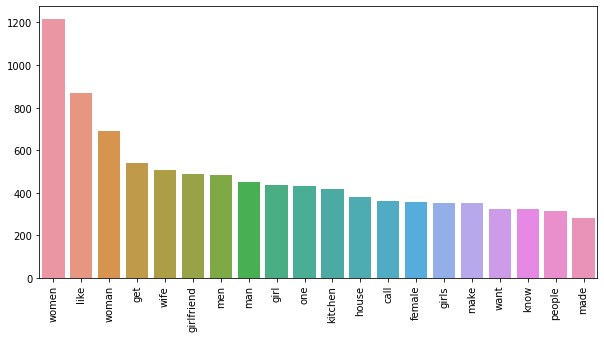

In [103]:
plt.figure(figsize=(10,5))
sb.barplot(x=list(most_common.keys())[:20],y=list(most_common.values())[:20])
plt.xticks(rotation='vertical')
plt.show()

# B) Remove the least common words words that their appearances are less than k=5, k=10, k=15

In [104]:
k_5 = dict([item for item in most_common.items() if item[1]>=5])
k_10 = dict([item for item in most_common.items() if item[1]>=10])
k_15 = dict([item for item in most_common.items() if item[1]>=15])

In [105]:
print(k_5,"\n\n")
print(k_10,"\n\n")
print(k_15)

{'women': 1215, 'like': 869, 'woman': 690, 'get': 542, 'wife': 509, 'girlfriend': 490, 'men': 483, 'man': 449, 'girl': 437, 'one': 431, 'kitchen': 418, 'house': 380, 'call': 363, 'female': 357, 'girls': 352, 'make': 351, 'want': 326, 'know': 324, 'people': 316, 'made': 283, '3': 279, 'net': 279, 'feminist': 273, 'see': 271, 'time': 269, 'day': 263, 'good': 260, 'got': 254, 'clean': 250, 'go': 243, 'first': 242, 'cheat': 239, 'new': 236, 'meme': 231, 'back': 226, 'look': 226, 'hooker': 223, 'never': 220, 'â': 218, 'think': 218, 'prostitute': 206, 'cooking': 204, 'feminism': 197, 'need': 197, 'sex': 197, 'work': 195, 'mom': 194, 'love': 191, 'right': 191, 'said': 190, 'ð': 190, '5': 189, 'still': 188, 'guy': 187, 'home': 186, '10': 185, '4': 180, 'feminists': 180, 'male': 179, 'memegenerator': 177, 'would': 176, 'fuck': 174, 'oh': 173, 'memeful': 169, 'say': 165, 'life': 165, 'na': 163, 'going': 162, 'white': 161, 'years': 161, '6': 161, 'x': 159, 'c': 157, 'tell': 156, 'old': 155, 'let'

In [106]:
k_5_size, k_5_frequencies = get_info_vocabulary(k_5)
k_10_size, k_10_frequencies = get_info_vocabulary(k_10)
k_15_size, k_15_frequencies = get_info_vocabulary(k_15)

In [107]:
print("K=5\n\tSize:",k_5_size,"\n\tFrequencies:",k_5_frequencies,"\n\n\n")
print("K=10\n\tSize:",k_10_size,"\n\tFrequencies:",k_10_frequencies,"\n\n\n")
print("K=15\n\tSize:",k_15_size,"\n\tFrequencies:",k_15_frequencies,"\n\n\n")

K=5
	Size: 3550 
	Frequencies: {'women': 0.014291, 'like': 0.010221, 'woman': 0.008116, 'get': 0.006375, 'wife': 0.005987, 'girlfriend': 0.005763, 'men': 0.005681, 'man': 0.005281, 'girl': 0.00514, 'one': 0.00507, 'kitchen': 0.004917, 'house': 0.00447, 'call': 0.00427, 'female': 0.004199, 'girls': 0.00414, 'make': 0.004129, 'want': 0.003834, 'know': 0.003811, 'people': 0.003717, 'made': 0.003329, '3': 0.003282, 'net': 0.003282, 'feminist': 0.003211, 'see': 0.003188, 'time': 0.003164, 'day': 0.003093, 'good': 0.003058, 'got': 0.002988, 'clean': 0.002941, 'go': 0.002858, 'first': 0.002846, 'cheat': 0.002811, 'new': 0.002776, 'meme': 0.002717, 'back': 0.002658, 'look': 0.002658, 'hooker': 0.002623, 'never': 0.002588, 'â': 0.002564, 'think': 0.002564, 'prostitute': 0.002423, 'cooking': 0.002399, 'feminism': 0.002317, 'need': 0.002317, 'sex': 0.002317, 'work': 0.002294, 'mom': 0.002282, 'love': 0.002247, 'right': 0.002247, 'said': 0.002235, 'ð': 0.002235, '5': 0.002223, 'still': 0.002211, '

## Ratio of the size of the vocabulary after filtering to size of the vocabulary before filtering.

In [108]:
print("\tK=5:", round(k_5_size/size_of_voc,2),"\n\tK=10:",round(k_10_size/size_of_voc,2),"\n\tK=15:",round(k_15_size/size_of_voc,2))

	K=5: 0.18 
	K=10: 0.09 
	K=15: 0.06


In [109]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

text_train_stem = text_train.apply(lambda x: [stemmer.stem(word) for word in x])
text_trial_stem = text_trial.apply(lambda x: [stemmer.stem(word) for word in x])

In [110]:
voc_stem = to_vocabolary(text_train_stem)
voc_stem_size, voc_stem_freq = get_info_vocabulary(voc_stem)

# C.1) Size and frequencies

In [111]:
print(voc_stem_size,"\n")
print(dict(sorted(voc_stem_freq.items(), key=lambda item: item[1], reverse=True)))

15981 

{'women': 0.011258, 'like': 0.008615, 'girl': 0.007239, 'get': 0.006844, 'woman': 0.00634, 'meme': 0.005055, 'wife': 0.004707, 'make': 0.004624, 'call': 0.004532, 'girlfriend': 0.004514, 'men': 0.004468, 'man': 0.004193, 'feminist': 0.004156, 'want': 0.004138, 'one': 0.004101, 'look': 0.00389, 'kitchen': 0.003844, 'go': 0.003725, 'femal': 0.003587, 'hous': 0.003551, 'say': 0.003431, 'know': 0.003285, 'think': 0.003101, 'time': 0.003083, 'fuck': 0.003028, 'day': 0.003, 'peopl': 0.002899, 'see': 0.002881, 'clean': 0.002743, 'right': 0.002725, 'guy': 0.002697, 'cheat': 0.002642, 'made': 0.002596, '3': 0.00256, 'net': 0.00256, 'work': 0.002532, 'year': 0.002468, 'cook': 0.002441, 'good': 0.002413, 'love': 0.002376, 'friend': 0.002349, 'need': 0.002349, 'got': 0.00233, 'hooker': 0.002257, 'first': 0.00222, 'tell': 0.002211, 'use': 0.002184, 'new': 0.002165, 'back': 0.00211, 'take': 0.002101, 'prostitut': 0.002055, 'never': 0.002018, 'ask': 0.002018, 'tri': 0.002009, 'â': 0.002, 'mom

## C.2) Most common words represented on Bar Plot.

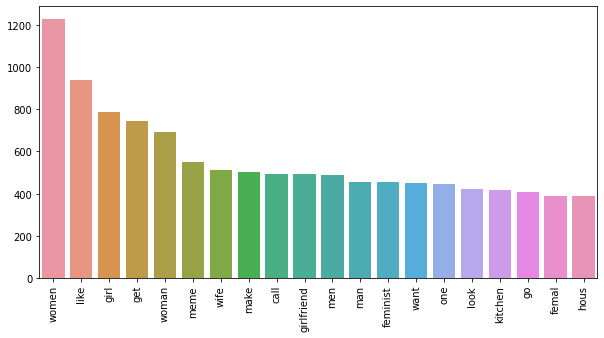

In [112]:
most_common_stem= dict(sorted(voc_stem.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(10,5))
sb.barplot(x=list(most_common_stem.keys())[:20],y=list(most_common_stem.values())[:20])
plt.xticks(rotation='vertical')
plt.show()

# Task 2

## Features

In [113]:
train_set['#unique_words'] = text_train_stem.apply(lambda x: len(set(x)))
train_set['#words'] = text_train_stem.apply(lambda x: len(x))
train_set['Text Transcription'] = text_train_stem.apply(lambda x: ' '.join(set(x))) 
train_set.drop(columns=['file_name'],axis=1, inplace=True)

In [114]:
train_set.head()

,misogynous,shaming,stereotype,objectification,violence,Text Transcription,#unique_words,#words
0,0,0,0,0,0,zip milk,2,3
1,1,0,0,0,1,say blue violet red rose ye rape,7,7
2,0,0,0,0,0,hooker hotel photo trump russian file wrong ne...,16,16
3,0,0,0,0,0,man 18 ignad woman seek,5,5
4,0,0,0,0,0,explain quarantin keep compani covid tolkein p...,15,16


## Predicting Misogyny

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
features = train_set.drop(columns=['misogynous','Text Transcription'],axis=1)
sentences = train_set['Text Transcription']
labels = train_set['misogynous']

x_train, x_valid, y_train, y_valid = train_test_split(sentences, labels, test_size=0.2, random_state=42, stratify=labels)

tfidf = TfidfVectorizer(max_features=1500, ngram_range=(1, 2))
x_train = tfidf.fit_transform(x_train)
x_valid = tfidf.transform(x_valid)


In [117]:
df_train = pd.DataFrame(data=x_train.toarray(), columns=tfidf.get_feature_names())
df_train = pd.concat([features,df_train],axis=1,join='inner')

df_valid = pd.DataFrame(data=x_valid.toarray(), columns=tfidf.get_feature_names())
df_valid = pd.concat([features,df_valid],axis=1, join='inner')

In [118]:
classifier = RandomForestClassifier(n_estimators=2500, random_state=42)
classifier.fit(df_train, y_train)
predictions = classifier.predict(df_valid)

In [119]:
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       992
           1       0.77      0.77      0.77      1008

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



In [120]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sb.barplot(x=fi_df['feature_importance'][:20], y=fi_df['feature_names'][:20])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

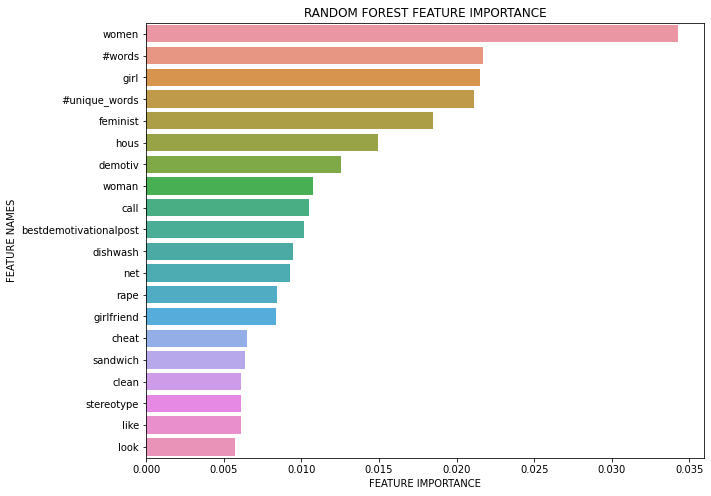

In [121]:
plot_feature_importance(classifier.feature_importances_,df_train.columns,'RANDOM FOREST')

# Task 3

In [122]:
import gensim
from gensim.models import word2vec

model = gensim.models.Word2Vec(text_train_stem, min_count = 1, size = 100, window = 3, sg = 1)

In [123]:
train_set['Text Transcription'] = text_train_stem.apply(lambda x: tuple(x))
word2vec_filename = 'word2vec.csv'
with open(word2vec_filename, 'w+') as word2vec_file:
    for index, row in train_set.iterrows():
        model_vector = (np.mean([model[token] for token in row['Text Transcription']], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(100))
            word2vec_file.write(header)
            word2vec_file.write("\n")
        # Check if the line exists else it is vector of zeros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(100)])
        word2vec_file.write(line1)
        word2vec_file.write('\n')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [124]:
word2vec_df = pd.read_csv(word2vec_filename)
classifier = RandomForestClassifier(n_estimators=2500,random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(word2vec_df, train_set['misogynous'], test_size=0.2, random_state=42, stratify=labels)
classifier.fit(x_train,y_train)
predictions = classifier.predict(x_valid)
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70      1054
           1       0.66      0.70      0.68       946

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

